In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/pandas_GIS/notebook

/content/drive/MyDrive/pandas_GIS/notebook


In [3]:
!pip install geopandas
!pip install mapclassify
!pip install pysal==2.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 14.4 MB/s 
     |████████████████████████████████| 16.7 MB 63.4 MB/s 
     |████████████████████████████████| 6.3 MB 53.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.9 MB 1.3 MB/s 
  Created wheel for pysal: filename=pysal-2.0.0-py3-none-any.whl size=25231765 sha256=1617f9fbe4afc51b0a04e3580ae605262afdaa79334abef330a746fdc11a6896
  Stored in directory: /root/.cache/pip/wheels/8d/42/fd/e6187fb8ce1701d471d18be675eb3c6d79353839d8a6094831
Successfully built pysal


In [4]:
import geopandas as gpd
%pylab inline
pylab.rcParams['figure.figsize'] = (20.0, 20.0)

Populating the interactive namespace from numpy and matplotlib


In [5]:
villages_shp = gpd.read_file('../geodata/台灣里界圖_TWD97/Village_NLSC_121_1050219.shp')

In [6]:
villages_shp.head()

,OBJECTID,UID,PRO_ID,COUNTY_ID,TOWN_ID,VILLAGE_ID,V_Name,T_Name,C_Name,Substitute,geometry
0,8573,7064,64,64,6401000,6401000-013,中興里,旗津區,高雄市,中興里,"POLYGON ((177607.758 2497521.111, 177630.724 2..."
1,8578,3626,10,10007,1000712,1000712-006,頂潭里,田中鎮,彰化縣,頂潭里,"POLYGON ((207765.541 2641446.581, 207796.390 2..."
2,8579,3627,10,10007,1000712,1000712-007,中潭里,田中鎮,彰化縣,中潭里,"POLYGON ((207195.132 2641217.485, 207196.409 2..."
3,8580,3628,10,10007,1000712,1000712-008,龍潭里,田中鎮,彰化縣,龍潭里,"POLYGON ((206697.079 2641761.284, 206702.181 2..."
4,8581,3642,10,10007,1000712,1000712-022,大社里,田中鎮,彰化縣,大社里,"POLYGON ((206697.079 2641761.284, 206692.842 2..."


In [7]:
import pandas as pd

In [8]:
census_villages = pd.read_csv('../geodata/104年12月人口數.csv', skiprows=[0])

In [9]:
census_villages.head()

,統計年月,區域別,村里,戶數,人口數,人口數-男,人口數-女,0歲-男,0歲-女,1歲-男,...,96歲-男,96歲-女,97歲-男,97歲-女,98歲-男,98歲-女,99歲-男,99歲-女,100歲以上-男,100歲以上-女
0,10412,新北市板橋區,留侯里,691,1649,786,863,5,8,10,...,1,0,0,0,0,1,0,0,0,1
1,10412,新北市板橋區,流芳里,638,1564,732,832,3,3,8,...,1,0,0,0,0,0,0,0,0,0
2,10412,新北市板橋區,赤松里,318,838,410,428,3,2,3,...,0,0,0,0,0,0,0,1,0,0
3,10412,新北市板橋區,黃石里,444,1191,579,612,3,2,4,...,0,0,0,0,0,0,0,0,1,1
4,10412,新北市板橋區,挹秀里,737,1796,875,921,2,6,1,...,1,0,1,0,0,0,0,0,0,0


In [10]:
census_villages['city'] = census_villages['區域別'].copy(deep=True)
census_villages['city'] = census_villages['city'].apply(lambda t: t[:3])

census_villages['district'] = census_villages['區域別'].copy(deep=True)
census_villages['district'] = census_villages['district'].apply(lambda t: t[3:])

# census_villages = census_villages[['city', 'district', '村里', '人口數']]

In [11]:
census_villages.head()

,統計年月,區域別,村里,戶數,人口數,人口數-男,人口數-女,0歲-男,0歲-女,1歲-男,...,97歲-男,97歲-女,98歲-男,98歲-女,99歲-男,99歲-女,100歲以上-男,100歲以上-女,city,district
0,10412,新北市板橋區,留侯里,691,1649,786,863,5,8,10,...,0,0,0,1,0,0,0,1,新北市,板橋區
1,10412,新北市板橋區,流芳里,638,1564,732,832,3,3,8,...,0,0,0,0,0,0,0,0,新北市,板橋區
2,10412,新北市板橋區,赤松里,318,838,410,428,3,2,3,...,0,0,0,0,0,1,0,0,新北市,板橋區
3,10412,新北市板橋區,黃石里,444,1191,579,612,3,2,4,...,0,0,0,0,0,0,1,1,新北市,板橋區
4,10412,新北市板橋區,挹秀里,737,1796,875,921,2,6,1,...,1,0,0,0,0,0,0,0,新北市,板橋區


In [12]:
demo_villages = ['惠楠里', '惠民里', '惠豐里', '莒光里', '合群里', '永清里', '橋頭里', '橋南里']
kaohsiung_villages_shp = villages_shp[villages_shp['C_Name']=='高雄市']

kaohsiung_villages_shp = kaohsiung_villages_shp[['C_Name', 'T_Name', 'V_Name', 'geometry']]

demo_villages_shp = kaohsiung_villages_shp[
    kaohsiung_villages_shp['V_Name'].apply(
        lambda t: True if t in demo_villages else False
    )
]

In [13]:
demo_villages_shp

,C_Name,T_Name,V_Name,geometry
16,高雄市,左營區,永清里,"POLYGON ((177943.168 2510441.206, 177941.344 2..."
17,高雄市,左營區,莒光里,"POLYGON ((177698.008 2511983.979, 177779.229 2..."
2675,高雄市,左營區,合群里,"POLYGON ((177309.430 2511593.884, 177310.425 2..."
2705,高雄市,楠梓區,惠楠里,"POLYGON ((181185.031 2514217.983, 181183.969 2..."
2706,高雄市,楠梓區,惠民里,"POLYGON ((180715.716 2514977.993, 180718.122 2..."
2707,高雄市,楠梓區,惠豐里,"POLYGON ((179848.500 2515160.500, 179859.625 2..."
3208,高雄市,橋頭區,橋頭里,"POLYGON ((179476.094 2517763.750, 179443.297 2..."
3209,高雄市,橋頭區,橋南里,"POLYGON ((179887.688 2517777.250, 179928.375 2..."


In [14]:
kaohsiung_census_villages = census_villages[census_villages['city'] == '高雄市']

demo_census_villages = kaohsiung_census_villages[kaohsiung_census_villages["村里"].isin(demo_villages)]

In [15]:
demo_census_villages = demo_census_villages[['city', 'district', '村里', '人口數']]

In [16]:
demo_census_villages

,city,district,村里,人口數
3430,高雄市,左營區,永清里,1288
3431,高雄市,左營區,莒光里,2024
3433,高雄市,左營區,合群里,2656
3463,高雄市,楠梓區,惠楠里,3533
3464,高雄市,楠梓區,惠民里,4514
3465,高雄市,楠梓區,惠豐里,5407
4020,高雄市,橋頭區,橋頭里,2550
4021,高雄市,橋頭區,橋南里,1299


In [17]:
demo_villages_shp

,C_Name,T_Name,V_Name,geometry
16,高雄市,左營區,永清里,"POLYGON ((177943.168 2510441.206, 177941.344 2..."
17,高雄市,左營區,莒光里,"POLYGON ((177698.008 2511983.979, 177779.229 2..."
2675,高雄市,左營區,合群里,"POLYGON ((177309.430 2511593.884, 177310.425 2..."
2705,高雄市,楠梓區,惠楠里,"POLYGON ((181185.031 2514217.983, 181183.969 2..."
2706,高雄市,楠梓區,惠民里,"POLYGON ((180715.716 2514977.993, 180718.122 2..."
2707,高雄市,楠梓區,惠豐里,"POLYGON ((179848.500 2515160.500, 179859.625 2..."
3208,高雄市,橋頭區,橋頭里,"POLYGON ((179476.094 2517763.750, 179443.297 2..."
3209,高雄市,橋頭區,橋南里,"POLYGON ((179887.688 2517777.250, 179928.375 2..."


In [18]:
demo_villages_shp_group = demo_villages_shp.groupby(by=['C_Name', 'T_Name'], as_index=False)

In [19]:
import shapely

In [20]:
demo_district_shp = gpd.GeoDataFrame(
    demo_villages_shp_group['geometry'].agg(lambda t: shapely.ops.unary_union(t)))

In [21]:
demo_district_shp

,C_Name,T_Name,geometry
0,高雄市,左營區,"POLYGON ((177941.344 2510438.366, 177858.176 2..."
1,高雄市,楠梓區,"POLYGON ((181183.969 2514213.028, 181178.496 2..."
2,高雄市,橋頭區,"POLYGON ((179928.375 2517730.000, 180017.094 2..."


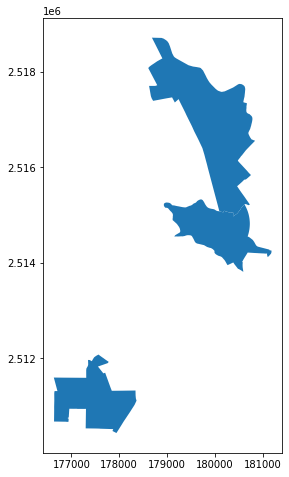

In [22]:
demo_district_shp.plot(figsize=(6,8))

In [23]:
demo_district_shp

,C_Name,T_Name,geometry
0,高雄市,左營區,"POLYGON ((177941.344 2510438.366, 177858.176 2..."
1,高雄市,楠梓區,"POLYGON ((181183.969 2514213.028, 181178.496 2..."
2,高雄市,橋頭區,"POLYGON ((179928.375 2517730.000, 180017.094 2..."


In [24]:
demo_census_villages_group = demo_census_villages.groupby(by=['city', 'district'], as_index=False)

In [25]:
demo_census_district = demo_census_villages_group['人口數'].sum()

In [26]:
demo_census_district

,city,district,人口數
0,高雄市,左營區,5968
1,高雄市,楠梓區,13454
2,高雄市,橋頭區,3849


In [27]:
demo_district_shp

,C_Name,T_Name,geometry
0,高雄市,左營區,"POLYGON ((177941.344 2510438.366, 177858.176 2..."
1,高雄市,楠梓區,"POLYGON ((181183.969 2514213.028, 181178.496 2..."
2,高雄市,橋頭區,"POLYGON ((179928.375 2517730.000, 180017.094 2..."


In [28]:
demo_census_district_shp = demo_district_shp.merge(
    demo_census_district,left_on=('C_Name', 'T_Name'),right_on=('city', 'district'))

In [29]:
demo_census_district_shp

,C_Name,T_Name,geometry,city,district,人口數
0,高雄市,左營區,"POLYGON ((177941.344 2510438.366, 177858.176 2...",高雄市,左營區,5968
1,高雄市,楠梓區,"POLYGON ((181183.969 2514213.028, 181178.496 2...",高雄市,楠梓區,13454
2,高雄市,橋頭區,"POLYGON ((179928.375 2517730.000, 180017.094 2...",高雄市,橋頭區,3849


In [30]:
demo_census_district_shp = gpd.GeoDataFrame(demo_census_district_shp)

In [31]:
import matplotlib.pyplot as plt

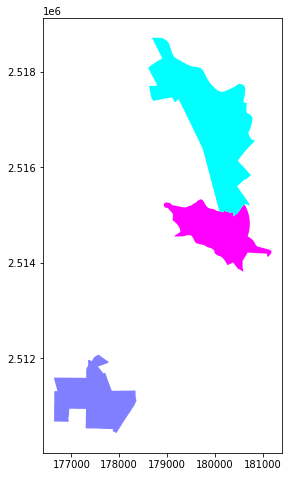

In [32]:
demo_census_district_shp.plot(column='人口數', scheme='QUANTILES', k=3, cmap='cool',figsize=(6,8))

In [33]:
roads = gpd.read_file('../geodata/Taiwan Road/roads.shp')
roads.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [34]:
roads = roads.to_crs(epsg=3826)

In [35]:
roads

,osm_id,name,ref,type,oneway,bridge,tunnel,maxspeed,geometry
0,4860359,重慶北路一段,None,secondary,1,0,0,NaN,"LINESTRING (301881.119 2771811.841, 301877.509..."
1,4860738,春日路,1;4;110,primary,1,0,0,NaN,"LINESTRING (281706.886 2765902.984, 281709.781..."
2,4860739,三民路三段,1;4,primary,1,0,0,NaN,"LINESTRING (280888.721 2764967.654, 280893.248..."
3,4860740,三民路,None,tertiary,1,0,0,NaN,"LINESTRING (282845.006 2765032.009, 282818.891..."
4,4860741,三民路三段,4,primary,0,0,0,NaN,"LINESTRING (281055.627 2763819.827, 281046.298..."
...,...,...,...,...,...,...,...,...,...
277035,421109079,None,None,footway,0,0,0,NaN,"LINESTRING (279508.386 2769013.865, 279556.258..."
277036,421109084,None,None,service,0,0,0,NaN,"LINESTRING (279552.331 2768927.033, 279519.418..."
277037,421109085,None,None,service,0,0,0,NaN,"LINESTRING (279477.506 2768933.772, 279488.939..."
277038,421109132,None,None,service,0,0,0,NaN,"LINESTRING (279629.489 2768747.574, 279620.566..."


In [36]:
taipei_shp = villages_shp[villages_shp['C_Name']=='臺北市']
taipei_roads = roads[roads.intersects(taipei_shp.unary_union)]

In [37]:
taipei_roads

,osm_id,name,ref,type,oneway,bridge,tunnel,maxspeed,geometry
0,4860359,重慶北路一段,None,secondary,1,0,0,NaN,"LINESTRING (301881.119 2771811.841, 301877.509..."
31,4928571,中山高速公路,1,motorway,1,1,0,100.0,"LINESTRING (312042.368 2773210.320, 311770.088..."
45,4947944,北平西路,None,residential,1,0,0,NaN,"LINESTRING (301790.924 2771215.959, 301777.741..."
46,4947947,太原路,None,residential,0,0,0,NaN,"LINESTRING (302155.364 2772213.686, 302155.968..."
47,4947948,None,None,residential,0,0,0,NaN,"LINESTRING (302045.816 2771714.505, 302202.339..."
...,...,...,...,...,...,...,...,...,...
277020,421051635,None,None,service,0,0,0,NaN,"LINESTRING (301491.516 2773006.473, 301468.677..."
277021,421051636,None,None,service,0,0,0,NaN,"LINESTRING (301704.265 2773142.314, 301705.080..."
277022,421051637,None,None,service,0,0,0,NaN,"LINESTRING (301472.315 2773290.109, 301493.210..."
277023,421051638,None,None,service,0,0,0,NaN,"LINESTRING (301394.821 2773167.363, 301387.570..."


In [38]:
len(taipei_roads)

25266

In [39]:
重慶路 = taipei_roads[taipei_roads['name'].str.contains('重慶')==True]
忠孝路 = taipei_roads[taipei_roads['name'].str.contains('忠孝')==True]
環河路 = taipei_roads[taipei_roads['name'].str.contains('環河')==True]

In [40]:
taipei_roads[taipei_roads['name'].str.match(r'^重慶.+一段')==True]

,osm_id,name,ref,type,oneway,bridge,tunnel,maxspeed,geometry
0,4860359,重慶北路一段,None,secondary,1,0,0,NaN,"LINESTRING (301881.119 2771811.841, 301877.509..."
600,22764010,重慶南路一段,None,tertiary,1,0,0,NaN,"LINESTRING (301789.804 2771096.371, 301790.606..."
601,22764012,重慶南路一段,None,tertiary,0,0,0,NaN,"LINESTRING (301788.990 2770685.622, 301787.907..."
70060,199239734,重慶北路一段,None,secondary,1,0,0,NaN,"LINESTRING (301891.456 2771866.189, 301887.886..."
70062,199239737,重慶北路一段,None,secondary,1,0,0,NaN,"LINESTRING (301899.900 2771840.047, 301902.878..."
102406,236724321,重慶南路一段46巷,None,living_street,0,0,0,NaN,"LINESTRING (301789.341 2770808.674, 301729.630..."
103273,238211714,重慶南路一段,None,tertiary,1,0,0,NaN,"LINESTRING (301790.420 2770968.471, 301790.420..."
103899,238699273,重慶南路一段,None,tertiary,1,0,0,NaN,"LINESTRING (301790.231 2770879.823, 301789.341..."
107031,241518682,重慶北路一段,None,tertiary,1,0,0,NaN,"LINESTRING (301790.463 2771111.493, 301789.804..."
109395,243906113,重慶北路一段,None,secondary,1,0,0,NaN,"LINESTRING (301895.169 2771813.212, 301899.900..."


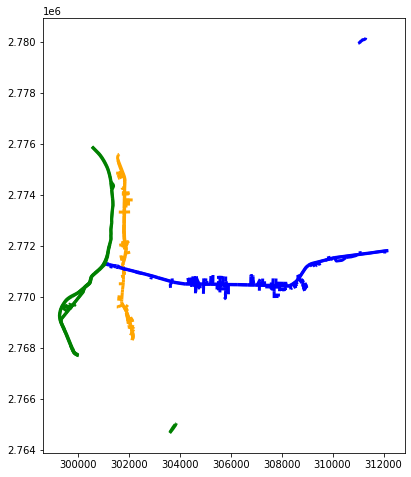

In [41]:
ax = 重慶路.plot(linewidth=3, color="Orange",figsize=(8,8))
忠孝路.plot(linewidth=3, ax=ax, color="Blue")
環河路.plot(linewidth=3, ax=ax,  color="Green")

In [42]:
忠孝重慶int = 忠孝路.unary_union.intersection(重慶路.unary_union).centroid
    
忠孝環河int = 忠孝路.unary_union.intersection(環河路.unary_union).centroid

In [43]:
忠孝重慶int.x , 忠孝重慶int.y

(301790.1332558039, 2771103.932011864)

In [44]:
忠孝環河int.x, 忠孝環河int.y

(301073.1813518459, 2771299.2108038547)

In [45]:
忠孝路_x = 忠孝路.geometry.centroid.apply(lambda t: t.x)

忠孝路_x

2116      307706.318665
5465      304933.213485
5505      305638.757523
5506      305695.072309
5513      305579.627932
              ...      
258134    301451.345794
263007    308909.395734
272065    308309.306409
272066    308309.582027
276576    304958.447860
Length: 250, dtype: float64

In [46]:
忠孝橋引道 = 忠孝路[(忠孝路_x < 忠孝重慶int.x)&(忠孝環河int.x < 忠孝路_x)]

In [47]:
忠孝橋引道

,osm_id,name,ref,type,oneway,bridge,tunnel,maxspeed,geometry
5596,48794897,忠孝西路一段,1;3,primary,1,0,0,NaN,"LINESTRING (301506.911 2771148.236, 301518.733..."
8181,51919202,忠孝西路二段,1,primary,1,0,0,NaN,"LINESTRING (301148.254 2771266.727, 301205.704..."
8182,51919203,忠孝西路二段,None,tertiary,1,0,0,NaN,"LINESTRING (301210.736 2771271.669, 301161.065..."
8183,51919204,忠孝西路二段,None,tertiary,1,0,0,NaN,"LINESTRING (301066.318 2771283.578, 301101.241..."
8186,51919208,忠孝西路二段,1,primary,1,0,0,NaN,"LINESTRING (301205.704 2771249.297, 301217.291..."
8187,51919209,忠孝西路二段,1,primary,1,0,0,NaN,"LINESTRING (301222.766 2771268.269, 301210.736..."
45566,160279690,忠孝西路二段16巷,None,service,0,0,0,NaN,"LINESTRING (301315.519 2771219.647, 301292.446..."
107022,241518672,忠孝西路一段,1;3,primary,1,0,0,NaN,"LINESTRING (301790.463 2771111.493, 301713.868..."
110007,244456579,忠孝西路一段,1;3,primary,1,0,0,NaN,"LINESTRING (301603.446 2771140.437, 301641.334..."
127003,264995112,忠孝西路一段,1;3,primary,1,0,0,NaN,"LINESTRING (301538.180 2771215.446, 301516.686..."


In [48]:
忠孝橋引道 = 忠孝橋引道[忠孝橋引道['type'] != 'service']

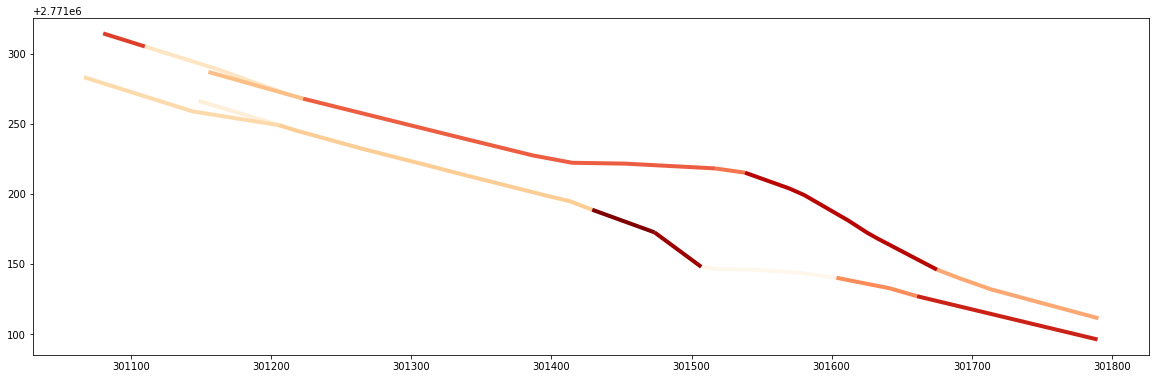

In [49]:
忠孝橋引道.plot(linewidth=4,cmap='OrRd')

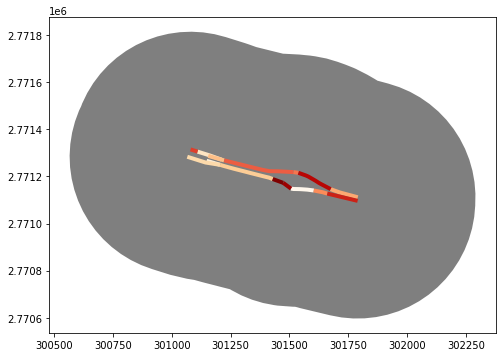

In [50]:
忠孝橋引道buffer = \
  gpd.GeoSeries(忠孝橋引道.unary_union.buffer(500))
ax = 忠孝橋引道buffer.plot(cmap='gray',alpha=0.5,figsize=(8,8))
忠孝橋引道.plot(ax=ax, linewidth=4,cmap='OrRd')

In [51]:
忠孝橋引道buffer

0    POLYGON ((300615.405 2771498.262, 300619.865 2...
dtype: geometry

In [52]:
#找到被影響的鄰里
influences_villages_shp =villages_shp[villages_shp.intersects(忠孝橋引道buffer.unary_union)==True]

In [53]:
influences_villages_shp.groupby("T_Name").size()

T_Name
三重區    3
中正區    2
大同區    6
萬華區    2
dtype: int64

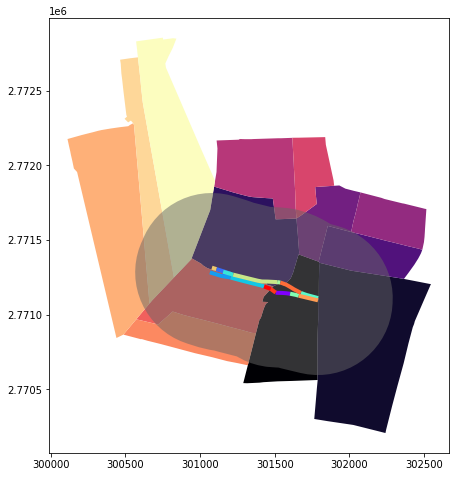

In [54]:
ax = influences_villages_shp.plot(cmap='magma',figsize=(8,8))
忠孝橋引道buffer.plot(ax=ax,cmap='Dark2_r',alpha=0.5)
忠孝橋引道.plot(ax=ax, linewidth=4,cmap='rainbow')

In [55]:
len(influences_villages_shp)

13

In [56]:
influences_villages_shp_clip = \
    influences_villages_shp.copy()
    
influences_villages_shp_clip['geometry'] = \
    influences_villages_shp_clip.intersection(忠孝橋引道buffer.unary_union)
    

In [57]:
influences_villages_shp_clip

,OBJECTID,UID,PRO_ID,COUNTY_ID,TOWN_ID,VILLAGE_ID,V_Name,T_Name,C_Name,Substitute,geometry
2365,4907,6383,63,63,6300500,6300500-023,光復里,中正區,臺北市,光復里,"POLYGON ((301796.468 2771354.597, 301796.817 2..."
2366,4908,6384,63,63,6300500,6300500-024,黎明里,中正區,臺北市,黎明里,"POLYGON ((301787.062 2770614.681, 301787.001 2..."
2374,4916,6392,63,63,6300600,6300600-001,玉泉里,大同區,臺北市,玉泉里,"POLYGON ((301500.030 2771686.655, 301506.540 2..."
2375,4917,6393,63,63,6300600,6300600-002,建明里,大同區,臺北市,建明里,"POLYGON ((302031.559 2771548.845, 302055.066 2..."
2376,4918,6394,63,63,6300600,6300600-003,建功里,大同區,臺北市,建功里,"POLYGON ((302012.187 2771553.461, 302009.291 2..."
2377,4919,6395,63,63,6300600,6300600-004,建泰里,大同區,臺北市,建泰里,"POLYGON ((302012.187 2771553.461, 302013.324 2..."
2378,4920,6396,63,63,6300600,6300600-005,永樂里,大同區,臺北市,永樂里,"POLYGON ((301579.657 2771641.233, 301564.804 2..."
2379,4921,6397,63,63,6300600,6300600-006,朝陽里,大同區,臺北市,朝陽里,"POLYGON ((301678.830 2771665.800, 301676.819 2..."
2399,4941,6417,63,63,6300700,6300700-001,福星里,萬華區,臺北市,福星里,"POLYGON ((301425.797 2771119.083, 301422.424 2..."
2400,4942,6418,63,63,6300700,6300700-002,萬壽里,萬華區,臺北市,萬壽里,"POLYGON ((301362.196 2770826.412, 301349.965 2..."


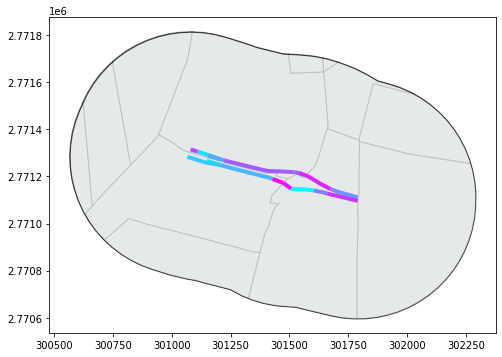

In [58]:
ax = influences_villages_shp_clip.plot(color='gray',alpha=0.5 ,edgecolor='black',figsize=(8,8))
忠孝橋引道buffer.plot(ax=ax,cmap='BuPu',alpha=0.7,edgecolor='black')
忠孝橋引道.plot(ax=ax, linewidth=4,cmap='cool')

In [59]:
influences_villages_shp

,OBJECTID,UID,PRO_ID,COUNTY_ID,TOWN_ID,VILLAGE_ID,V_Name,T_Name,C_Name,Substitute,geometry
2365,4907,6383,63,63,6300500,6300500-023,光復里,中正區,臺北市,光復里,"POLYGON ((301794.593 2771355.223, 301796.468 2..."
2366,4908,6384,63,63,6300500,6300500-024,黎明里,中正區,臺北市,黎明里,"POLYGON ((302365.137 2771239.724, 302400.016 2..."
2374,4916,6392,63,63,6300600,6300600-001,玉泉里,大同區,臺北市,玉泉里,"POLYGON ((301272.248 2771805.174, 301324.882 2..."
2375,4917,6393,63,63,6300600,6300600-002,建明里,大同區,臺北市,建明里,"POLYGON ((302012.187 2771553.461, 302071.696 2..."
2376,4918,6394,63,63,6300600,6300600-003,建功里,大同區,臺北市,建功里,"POLYGON ((302074.488 2771818.711, 302073.693 2..."
2377,4919,6395,63,63,6300600,6300600-004,建泰里,大同區,臺北市,建泰里,"POLYGON ((302235.553 2771774.570, 302296.081 2..."
2378,4920,6396,63,63,6300600,6300600-005,永樂里,大同區,臺北市,永樂里,"POLYGON ((301645.844 2771644.124, 301579.657 2..."
2379,4921,6397,63,63,6300600,6300600-006,朝陽里,大同區,臺北市,朝陽里,"POLYGON ((301898.167 2771863.094, 301890.800 2..."
2399,4941,6417,63,63,6300700,6300700-001,福星里,萬華區,臺北市,福星里,"POLYGON ((301490.828 2771189.771, 301425.797 2..."
2400,4942,6418,63,63,6300700,6300700-002,萬壽里,萬華區,臺北市,萬壽里,"POLYGON ((301374.751 2770876.374, 301362.196 2..."


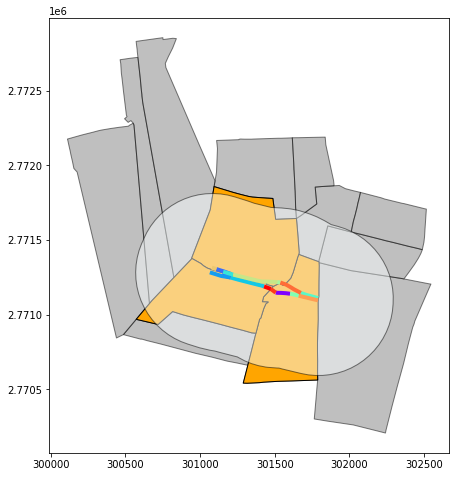

In [60]:
ax = influences_villages_shp.plot(color='gray',alpha=0.5 ,edgecolor='black',figsize=(8,8))

influences_villages_shp[(influences_villages_shp_clip['geometry'].area / influences_villages_shp['geometry'].area)> 0.8].plot(ax=ax,color='Orange',edgecolor='black')

忠孝橋引道buffer.plot(ax=ax,cmap='BuPu',alpha=0.5,edgecolor='black')
忠孝橋引道.plot(ax=ax, linewidth=4,cmap='rainbow')

In [61]:
za=influences_villages_shp[['C_Name','Substitute','geometry']]
za.head()

,C_Name,Substitute,geometry
2365,臺北市,光復里,"POLYGON ((301794.593 2771355.223, 301796.468 2..."
2366,臺北市,黎明里,"POLYGON ((302365.137 2771239.724, 302400.016 2..."
2374,臺北市,玉泉里,"POLYGON ((301272.248 2771805.174, 301324.882 2..."
2375,臺北市,建明里,"POLYGON ((302012.187 2771553.461, 302071.696 2..."
2376,臺北市,建功里,"POLYGON ((302074.488 2771818.711, 302073.693 2..."


## 癌症統計空間圖

In [92]:
import pandas as pd

In [73]:
cancer_death = pd.read_csv('../geodata/全癌症/cancer105.csv')

In [74]:
cancer_death.head()

,year,county,cause,sex,age_code,N
0,105,101,1,1,14,1
1,105,101,1,1,15,1
2,105,101,1,1,16,3
3,105,101,1,1,17,3
4,105,101,1,1,18,3


In [75]:
county_code = pd.read_csv("../geodata/全癌症/County_Code_100.csv",encoding="Big5")
county_code.head()

,county,100年~鄉鎮市區
0,101,臺北市松山區
1,102,臺北市大安區
2,109,臺北市大同區
3,110,臺北市中山區
4,111,臺北市內湖區


In [76]:
cancer_death_new = pd.merge(left=cancer_death, right=county_code, left_on='county',right_on='county')
cancer_death_new.head() 

,year,county,cause,sex,age_code,N,100年~鄉鎮市區
0,105,101,1,1,14,1,臺北市松山區
1,105,101,1,1,15,1,臺北市松山區
2,105,101,1,1,16,3,臺北市松山區
3,105,101,1,1,17,3,臺北市松山區
4,105,101,1,1,18,3,臺北市松山區


In [77]:
cancer_death_new['city'] = cancer_death_new['100年~鄉鎮市區'].apply(lambda t: t[:3])
cancer_death_new.head()

,year,county,cause,sex,age_code,N,100年~鄉鎮市區,city
0,105,101,1,1,14,1,臺北市松山區,臺北市
1,105,101,1,1,15,1,臺北市松山區,臺北市
2,105,101,1,1,16,3,臺北市松山區,臺北市
3,105,101,1,1,17,3,臺北市松山區,臺北市
4,105,101,1,1,18,3,臺北市松山區,臺北市


In [78]:
taichung_cancer_death=cancer_death_new[cancer_death_new['city']=='臺中市']
taichung_cancer_death.head()

,year,county,cause,sex,age_code,N,100年~鄉鎮市區,city
2490,105,301,1,1,14,2,臺中市豐原區,臺中市
2491,105,301,1,1,16,7,臺中市豐原區,臺中市
2492,105,301,1,1,17,4,臺中市豐原區,臺中市
2493,105,301,1,1,18,4,臺中市豐原區,臺中市
2494,105,301,1,1,20,1,臺中市豐原區,臺中市


In [79]:
cancer_code = pd.read_csv('../geodata/全癌症/CancerCode_97.csv',encoding="Big5")
cancer_code.head()

,97年以後cause,死因分類,ICD-10
0,1,口腔癌,"C00-C06, C09-C10, C12-C14"
1,2,主唾液腺癌,C07-C08
2,3,鼻咽癌,C11
3,4,食道癌,C15
4,5,胃癌,C16


In [80]:
cancer_code=cancer_code.drop(['ICD-10'], axis=1)

In [81]:
taichung_cancer_death1=pd.merge(left=taichung_cancer_death, right=cancer_code, left_on='cause',right_on='97年以後cause')
taichung_cancer_death1.head()

,year,county,cause,sex,age_code,N,100年~鄉鎮市區,city,97年以後cause,死因分類
0,105,301,1,1,14,2,臺中市豐原區,臺中市,1,口腔癌
1,105,301,1,1,16,7,臺中市豐原區,臺中市,1,口腔癌
2,105,301,1,1,17,4,臺中市豐原區,臺中市,1,口腔癌
3,105,301,1,1,18,4,臺中市豐原區,臺中市,1,口腔癌
4,105,301,1,1,20,1,臺中市豐原區,臺中市,1,口腔癌


In [82]:
taichung_cancer_death_M = taichung_cancer_death1[taichung_cancer_death1['sex']==1]
taichung_cancer_death_M.head()

,year,county,cause,sex,age_code,N,100年~鄉鎮市區,city,97年以後cause,死因分類
0,105,301,1,1,14,2,臺中市豐原區,臺中市,1,口腔癌
1,105,301,1,1,16,7,臺中市豐原區,臺中市,1,口腔癌
2,105,301,1,1,17,4,臺中市豐原區,臺中市,1,口腔癌
3,105,301,1,1,18,4,臺中市豐原區,臺中市,1,口腔癌
4,105,301,1,1,20,1,臺中市豐原區,臺中市,1,口腔癌


In [83]:
town_shp = gpd.read_file('../geodata/行政區域界線圖資/TOWN_MOI_1100415.shp', encoding="utf-8")
town_shp

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry
0,V02,10014020,臺東縣,成功鎮,Chenggong Township,V,10014,"POLYGON ((121.40982 23.21369, 121.40984 23.213..."
1,T21,10013210,屏東縣,佳冬鄉,Jiadong Township,T,10013,"POLYGON ((120.54846 22.46067, 120.54853 22.460..."
2,P13,10009130,雲林縣,麥寮鄉,Mailiao Township,P,10009,"POLYGON ((120.30198 23.81625, 120.30197 23.815..."
3,V11,10014110,臺東縣,綠島鄉,Ludao Township,V,10014,"MULTIPOLYGON (((121.49155 22.67746, 121.49185 ..."
4,V16,10014160,臺東縣,蘭嶼鄉,Lanyu Township,V,10014,"MULTIPOLYGON (((121.61180 21.94290, 121.61133 ..."
...,...,...,...,...,...,...,...,...
363,B27,66000270,臺中市,太平區,Taiping District,B,66000,"POLYGON ((120.80263 24.16947, 120.80258 24.169..."
364,U12,10015120,花蓮縣,萬榮鄉,Wanrong Township,U,10015,"POLYGON ((121.27481 23.92640, 121.27521 23.926..."
365,U07,10015020,花蓮縣,鳳林鎮,Fenglin Township,U,10015,"POLYGON ((121.52611 23.81732, 121.52628 23.817..."
366,H10,68000100,桃園市,平鎮區,Pingzhen District,H,68000,"POLYGON ((121.19051 24.97123, 121.19058 24.971..."


In [84]:
taichung_town_shp=town_shp[town_shp['COUNTYNAME']=='臺中市']
taichung_town_shp.head()

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry
40,B25,66000250,臺中市,龍井區,Longjing District,B,66000,"POLYGON ((120.48718 24.24761, 120.48785 24.246..."
41,B18,66000180,臺中市,大雅區,Daya District,B,66000,"POLYGON ((120.63445 24.25916, 120.63499 24.259..."
42,B13,66000130,臺中市,沙鹿區,Shalu District,B,66000,"POLYGON ((120.58312 24.26899, 120.58376 24.268..."
43,B14,66000140,臺中市,梧棲區,Wuqi District,B,66000,"POLYGON ((120.51007 24.28782, 120.51054 24.287..."
215,B09,66000090,臺中市,豐原區,Fengyuan District,B,66000,"POLYGON ((120.74824 24.28065, 120.74858 24.280..."


In [85]:
taichung_cancer_death_M_counts=taichung_cancer_death_M.groupby('100年~鄉鎮市區').N.sum()
taichung_cancer_death_M_counts.head(6)

100年~鄉鎮市區
臺中市中區      27
臺中市北區     171
臺中市北屯區    238
臺中市南區      96
臺中市南屯區    116
臺中市后里區     80
Name: N, dtype: int64

In [86]:
taichung_cancer_death_M_counts = pd.DataFrame(taichung_cancer_death_M_counts)
taichung_cancer_death_M_counts.head()

,N
100年~鄉鎮市區,
臺中市中區,27
臺中市北區,171
臺中市北屯區,238
臺中市南區,96
臺中市南屯區,116


In [87]:
taichung_cancer_death_M_counts.index

Index(['臺中市中區', '臺中市北區', '臺中市北屯區', '臺中市南區', '臺中市南屯區', '臺中市后里區', '臺中市和平區',
       '臺中市外埔區', '臺中市大安區', '臺中市大甲區', '臺中市大肚區', '臺中市大里區', '臺中市大雅區', '臺中市太平區',
       '臺中市新社區', '臺中市東勢區', '臺中市東區', '臺中市梧棲區', '臺中市沙鹿區', '臺中市清水區', '臺中市潭子區',
       '臺中市烏日區', '臺中市石岡區', '臺中市神岡區', '臺中市西區', '臺中市西屯區', '臺中市豐原區', '臺中市霧峰區',
       '臺中市龍井區'],
      dtype='object', name='100年~鄉鎮市區')

In [88]:
taichung_cancer_death_M_counts['District']=taichung_cancer_death_M_counts.index
taichung_cancer_death_M_counts.head()

,N,District
100年~鄉鎮市區,,
臺中市中區,27,臺中市中區
臺中市北區,171,臺中市北區
臺中市北屯區,238,臺中市北屯區
臺中市南區,96,臺中市南區
臺中市南屯區,116,臺中市南屯區


In [89]:
taichung_cancer_death_M_counts['City']=taichung_cancer_death_M_counts['District'].apply(lambda t: t[:3])
taichung_cancer_death_M_counts['District']=taichung_cancer_death_M_counts['District'].apply(lambda t: t[3:])
taichung_cancer_death_M_counts.head()

,N,District,City
100年~鄉鎮市區,,,
臺中市中區,27,中區,臺中市
臺中市北區,171,北區,臺中市
臺中市北屯區,238,北屯區,臺中市
臺中市南區,96,南區,臺中市
臺中市南屯區,116,南屯區,臺中市


In [90]:
Taichung_CancerDeathDistrict = taichung_town_shp.merge(taichung_cancer_death_M_counts, left_on=('COUNTYNAME','TOWNNAME'), right_on=('City','District'))
Taichung_CancerDeathDistrict.head()

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry,N,District,City
0,B25,66000250,臺中市,龍井區,Longjing District,B,66000,"POLYGON ((120.48718 24.24761, 120.48785 24.246...",102,龍井區,臺中市
1,B18,66000180,臺中市,大雅區,Daya District,B,66000,"POLYGON ((120.63445 24.25916, 120.63499 24.259...",89,大雅區,臺中市
2,B13,66000130,臺中市,沙鹿區,Shalu District,B,66000,"POLYGON ((120.58312 24.26899, 120.58376 24.268...",80,沙鹿區,臺中市
3,B14,66000140,臺中市,梧棲區,Wuqi District,B,66000,"POLYGON ((120.51007 24.28782, 120.51054 24.287...",64,梧棲區,臺中市
4,B09,66000090,臺中市,豐原區,Fengyuan District,B,66000,"POLYGON ((120.74824 24.28065, 120.74858 24.280...",187,豐原區,臺中市


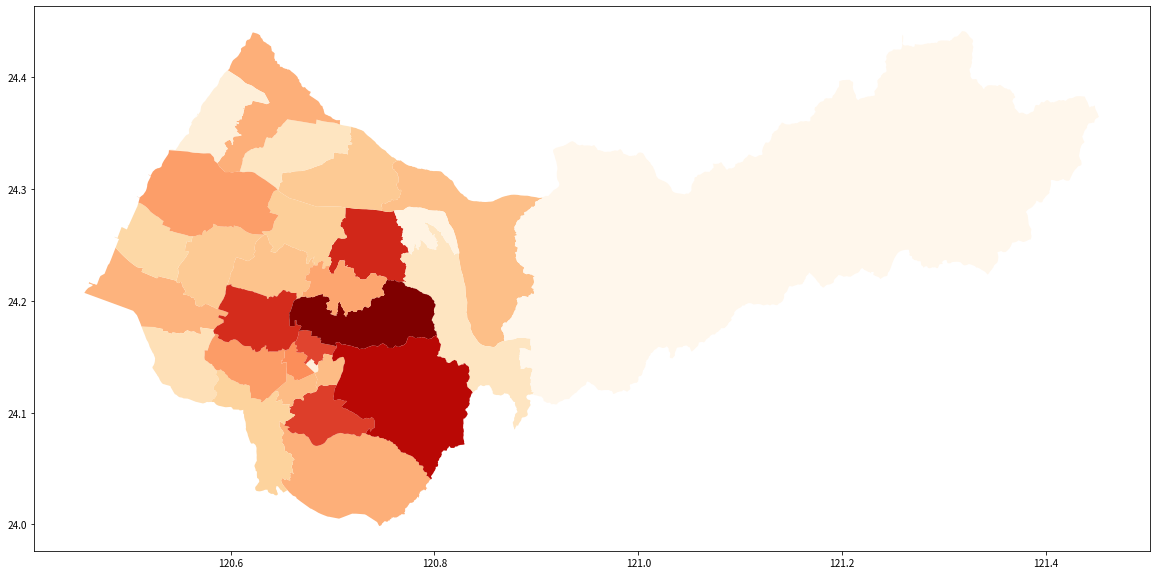

In [91]:
Taichung_CancerDeathDistrict.plot(column='N', cmap='OrRd')